<a href="https://colab.research.google.com/github/seiji0906/machine/blob/main/%E3%82%B9%E3%83%94%E3%83%B3%E3%83%87%E3%83%BC%E3%82%BF%E7%94%BB%E5%83%8F%E7%94%9F%E6%88%90%2B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92L%3D100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from numpy.core.fromnumeric import ravel
# データの作成

import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
def neighor_spin_sum(s, x, y):
    x_right=x+1
    x_left=x-1
    y_up=y+1
    y_down=y-1

    # 周期境界条件
    if x_right>=Nx:
        x_right-=Nx
    if x_left<0:
        x_left+=Nx
    if y_up>=Ny:
        y_up-=Ny
    if y_down<0:
        y_down+=Ny

    neighor_spin_sum=s[x_right][y]+s[x_left][y]+s[x][y_up]+s[x][y_down]
    return neighor_spin_sum

In [4]:
def calc_energy(s, h=0.01):
    energy = 0
    for x in range(Nx):
        for y in range(Ny):
            # dobule count
            energy += - neighor_spin_sum(s, x, y)/2
    energy += h*np.sum(s)
    return energy

In [5]:
def gibbs_sampling(s, beta=1.0, h=0.0):
    xs=list(range(Nx))
    random.shuffle(xs)
    ys=list(range(Ny))
    random.shuffle(ys)
    for x in xs:
        for y in ys:
            k=neighor_spin_sum(s, x, y)-h
            trans_prob = np.exp(beta*k) / (np.exp(beta*k)+np.exp(-beta*k))
            if np.random.random()<=trans_prob:
                s[x][y]=1
            else:
                s[x][y]=-1
    return s

In [ ]:
# 相転移データ作成
import matplotlib.animation as animation
from matplotlib import rc
import cv2
import glob as glob
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

path = '/content/drive/MyDrive/Colab Notebooks'

Nx = 100
Ny = 100
steps=100
# 初期配位

# betas=np.linspace(0.005, 0.05, 50).tolist()
# betas=np.linspace(1.0, 2.0,50).tolist()
# betas=np.linspace(0.3, 0.6, 300).tolist()
# betas=np.linspace(0.05, 1.0, 50).tolist()
# betas=np.linspace(0.3, 0.6, 50).tolist()
# betas=np.linspace(0.5, 1.0, 50).tolist()
# betas=np.linspace(0.25, 0.5, 100).tolist()
betas=np.linspace(0.1, 0.4, 50).tolist()
# betas=np.linspace(0.4, 0.5, 50).tolist()

for beta in betas:

  fig, ax = plt.subplots(figsize=(6,6))
  ax.axis("off")

  s = np.random.randint(0, 2, (Nx, Ny)).tolist()

  for i in range(20):

    for step in range(steps):
      s = gibbs_sampling(s, beta=beta, h=0)

      if step>=99:
        im = ax.imshow(s, animated=True)

        fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
        filename = '/content/drive/MyDrive/Colab Notebooks/常磁性L=100/beta={}_step={}.jpg'.format(beta, i)
        # filename = '/content/drive/MyDrive/Colab Notebooks/強磁性0125/beta={}_step={}.jpg'.format(beta, i)
        # filename = '/content/drive/MyDrive/Colab Notebooks/相転移0.4_0.5/beta={}_{}.jpg'.format(beta, i)

        plt.savefig(filename)
        print(filename)
      
  plt.close()

In [ ]:
# 相転移データ作成
import matplotlib.animation as animation
from matplotlib import rc
import cv2
import glob as glob
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

path = '/content/drive/MyDrive/Colab Notebooks'

Nx = 100
Ny = 100
steps=100
# 初期配位

# betas=np.linspace(0.005, 0.05, 50).tolist()
# betas=np.linspace(1.0, 2.0,50).tolist()
# betas=np.linspace(0.3, 0.6, 300).tolist()
# betas=np.linspace(0.05, 1.0, 50).tolist()
# betas=np.linspace(0.3, 0.6, 50).tolist()
# betas=np.linspace(0.5, 1.0, 50).tolist()
# betas=np.linspace(0.25, 0.5, 100).tolist()
# betas=np.linspace(0.1, 0.4, 50).tolist()
betas=np.linspace(0.5, 1.0, 50).tolist()
# betas=np.linspace(0.4, 0.5, 50).tolist()

for beta in betas:

  fig, ax = plt.subplots(figsize=(6,6))
  ax.axis("off")

  s = np.random.randint(0, 2, (Nx, Ny)).tolist()

  for i in range(20):

    for step in range(steps):
      s = gibbs_sampling(s, beta=beta, h=0)

      if step>=99:
        im = ax.imshow(s, animated=True)

        fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
        # filename = '/content/drive/MyDrive/Colab Notebooks/常磁性L=100/beta={}_step={}.jpg'.format(beta, i)
        filename = '/content/drive/MyDrive/Colab Notebooks/強磁性L=100/beta={}_step={}.jpg'.format(beta, i)
        # filename = '/content/drive/MyDrive/Colab Notebooks/相転移0.4_0.5/beta={}_{}.jpg'.format(beta, i)

        plt.savefig(filename)
        print(filename)
      
  plt.close()

In [6]:
# 相転移データ作成
import matplotlib.animation as animation
from matplotlib import rc
import cv2
import glob as glob
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

path = '/content/drive/MyDrive/Colab Notebooks'

Nx = 100
Ny = 100
steps=100
# 初期配位

# betas=np.linspace(0.005, 0.05, 50).tolist()
# betas=np.linspace(1.0, 2.0,50).tolist()
# betas=np.linspace(0.3, 0.6, 300).tolist()
# betas=np.linspace(0.05, 1.0, 50).tolist()
# betas=np.linspace(0.3, 0.6, 50).tolist()
# betas=np.linspace(0.5, 1.0, 50).tolist()
# betas=np.linspace(0.25, 0.5, 100).tolist()
# betas=np.linspace(0.1, 0.4, 50).tolist()
# betas=np.linspace(0.5, 1.0, 50).tolist()
betas=np.linspace(0.4, 0.5, 50).tolist()

for beta in betas:

  fig, ax = plt.subplots(figsize=(6,6))
  ax.axis("off")

  s = np.random.randint(0, 2, (Nx, Ny)).tolist()

  for i in range(20):

    for step in range(steps):
      s = gibbs_sampling(s, beta=beta, h=0)

      if step>=99:
        im = ax.imshow(s, animated=True)

        fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
        # filename = '/content/drive/MyDrive/Colab Notebooks/常磁性L=100/beta={}_step={}.jpg'.format(beta, i)
        # filename = '/content/drive/MyDrive/Colab Notebooks/強磁性L=100/beta={}_step={}.jpg'.format(beta, i)
        filename = '/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta={}_{}.jpg'.format(beta, i)

        plt.savefig(filename)
        print(filename)
      
  plt.close()

/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta=0.4_0.jpg
/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta=0.4_1.jpg
/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta=0.4_2.jpg
/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta=0.4_3.jpg
/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta=0.4_4.jpg
/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta=0.4_5.jpg
/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta=0.4_6.jpg
/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta=0.4_7.jpg
/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta=0.4_8.jpg
/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta=0.4_9.jpg
/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta=0.4_10.jpg
/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta=0.4_11.jpg
/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta=0.4_12.jpg
/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta=0.4_13.jpg
/content/drive/MyDrive/Colab Notebooks/相転移L=100/beta=0.4_14.jpg
/content/drive/MyDrive/Colab Notebooks/相転移L=100/be

In [7]:
# # 温度指定

# import matplotlib.animation as animation
# from matplotlib import rc


# Nx = 100
# Ny = 100
# steps=100
# # 初期配位

# fig, ax = plt.subplots(figsize=(6,6))
# ax.axis("off")
# ims = []

# s = np.random.randint(0, 2, (Nx, Ny)).tolist()

# for step in range(steps):
#   s = gibbs_sampling(s, beta=0.1, h=0)
#   if step>=0:
#     im = ax.imshow(s, animated=True)
#     ims.append([im])

#     fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
#     filename = '/content/drive/MyDrive/Colab Notebooks/テスト/beta=0,8_steps={}.jpg'.format(step)
#     # plt.savefig(filename)
#     print(filename)
    

# # ArtistAnimationにfigオブジェクトとimsを代入してアニメーションを作成
# anim = animation.ArtistAnimation(fig, ims)
# # Google Colaboratoryの場合必要
# rc('animation', html='jshtml')
# plt.close()
# anim

In [8]:
# 値設定

maxbeta = 0.5
minbeta = 0.4
folder_name = '相転移L=100'
epoch = 10
batch_size = 32
split = 50

In [9]:
import numpy as np
import cv2
import glob as glob
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

path = '/content/drive/MyDrive/Colab Notebooks'


folder = ['常磁性L=100', '強磁性L=100']

X_image = []
Y_label = []

for label,class_name in enumerate(folder):
  files = glob.glob(path + "/" +  class_name + "/*.jpg")
  for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,dsize=(180,180))
    X_image.append(img)
    Y_label.append(label)

X_image = np.array(X_image)
X_image = X_image.astype('float32')
X_image /= 255.0

Y_label = np.array(Y_label)
Y_label = np_utils.to_categorical(Y_label, len(folder))
Y_label[:5]



X_train,X_test,Y_train,Y_test = train_test_split(X_image,Y_label,test_size=0.2, shuffle=True)

print(len(X_train))
print(len(X_test))

1600
400


In [10]:
from tensorflow.python import metrics
from warnings import filters
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 1))

leaky_relu = keras.layers.LeakyReLU(alpha=0.2)

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(2, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss="binary_crossentropy",
              optimizer=adam,
              metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 1)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [11]:
# 学習データで学習
# model.fit(X_train, Y_train, epochs=10, batch_size=64)
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch_size)

#テストデータで精度確認
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

Epoch 1/10
50/50 [==============================] - 70s 1s/step - loss: 0.5790 - accuracy: 0.6394
Epoch 2/10
50/50 [==============================] - 71s 1s/step - loss: 0.0293 - accuracy: 0.9994
Epoch 3/10
50/50 [==============================] - 69s 1s/step - loss: 0.2103 - accuracy: 0.9575
Epoch 4/10
50/50 [==============================] - 69s 1s/step - loss: 0.0457 - accuracy: 0.9994
Epoch 5/10
50/50 [==============================] - 69s 1s/step - loss: 0.0108 - accuracy: 0.9994
Epoch 6/10
50/50 [==============================] - 69s 1s/step - loss: 0.0089 - accuracy: 0.9994
Epoch 7/10
50/50 [==============================] - 71s 1s/step - loss: 0.0091 - accuracy: 0.9994
Epoch 8/10
50/50 [==============================] - 69s 1s/step - loss: 0.0084 - accuracy: 0.9994
Epoch 9/10
50/50 [==============================] - 69s 1s/step - loss: 0.0080 - accuracy: 0.9994
Epoch 10/10
13/13 [==============================] - 5s 390ms/step - loss: 0.0268 - accuracy: 0.9975


In [12]:
path = '/content/drive/MyDrive/Colab Notebooks'


folder = [folder_name]

X_image = []

for label,class_name in enumerate(folder):
  files = glob.glob(path + "/" +  class_name + "/*.jpg")
  for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,dsize=(180,180))
    X_image.append(img)

X_image = np.array(X_image)
X_image = X_image.astype('float32')
X_image /= 255.0

print(len(X_image))

1000


In [13]:
history = model.predict(X_image)

32/32 [==============================] - 13s 397ms/step


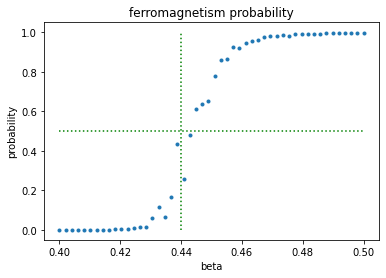

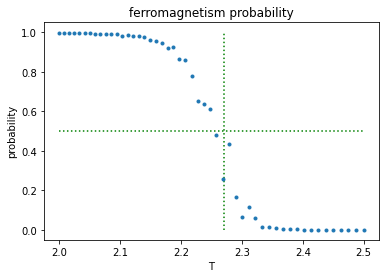

In [14]:
import matplotlib.pyplot as plt
from statistics import mean

# plt.plot(history)

predict = []

for i in range(len(history)):
  predict.append(history[i][1])


result = []

p = 0

for i in range(split):
  for j in range(20):
    p += predict[i*20+j]
  result.append(p / 20)
  p = 0

betas=np.linspace(minbeta, maxbeta, split).tolist()
T = list(map(lambda x: 1/x, betas))

# まずはbetaの値でやってみて、0.44かどうかをみる

# beta-probability
fig, ax = plt.subplots()
plt.title("ferromagnetism probability")
plt.xlabel('beta')
plt.ylabel('probability')
plt.hlines(0.5, minbeta, maxbeta, color='g', linestyles='dotted')
plt.vlines(0.44, 0, 1, color='g', linestyles='dotted')
ax.errorbar(betas, result, capsize=4, marker='.', linestyle="")
plt.show()

# T-probability
fig, ax = plt.subplots()
plt.title("ferromagnetism probability")
plt.xlabel('T')
plt.ylabel('probability')
plt.hlines(0.5, 1/maxbeta, 1/minbeta, color='g', linestyles='dotted')
plt.vlines(2.27, 0, 1, color='g', linestyles='dotted')
ax.errorbar(T, result, capsize=4, marker='.', linestyle="")
plt.show()

In [23]:
num=21
print(result)

print(result[num])
print(betas[num])
print(T[num])

[0.0004306514842028264, 0.0004801109756954247, 0.0007233763084514066, 0.00039963288509170525, 0.0010151824884815142, 0.000959863555181073, 0.0011065254722780083, 0.0010900319946813397, 0.0017017448546539527, 0.002631982103048358, 0.0050838301525800485, 0.005336668347445084, 0.010683489819712122, 0.014304841838020365, 0.014310428671888076, 0.058025051443837586, 0.11760244853794574, 0.06646363525651396, 0.1678622044622898, 0.4340111009776592, 0.2598301352933049, 0.4810242958366871, 0.6139489591121674, 0.6394831955432891, 0.653149189054966, 0.7776924028992653, 0.8588136613368988, 0.8652706742286682, 0.9241959750652313, 0.9213581353425979, 0.9457919657230377, 0.9544225245714187, 0.9615065336227417, 0.9748806357383728, 0.9789384245872498, 0.9797803938388825, 0.9854493021965027, 0.9831265330314636, 0.9899063497781754, 0.9916451752185822, 0.9924352556467056, 0.9928656399250031, 0.9930263817310333, 0.995029303431511, 0.9953095465898514, 0.9957312792539597, 0.9968185126781464, 0.996889436244964